In [1]:
import pickle
import os
import numpy as np

from detection.vision.camproj import im2world_known_z
import carlasim.carla_tform as tform

In [2]:
with open('../calib_data.pkl', 'rb') as f:
        calib_data = pickle.load(f)
K = calib_data['K']
R = calib_data['R']
x0 = calib_data['x0']

In [3]:
H = R.T @ np.linalg.inv(K)
x0 = np.array([0, 0, 1.5])
N = 50
u = 400*np.ones((1, N))
v = np.linspace(600, 320, N).reshape((1, -1))
px = np.concatenate([u, v])
coords = im2world_known_z(H, x0, px, np.zeros((1, N)))

Text(0, 0.5, 'depth [m]')

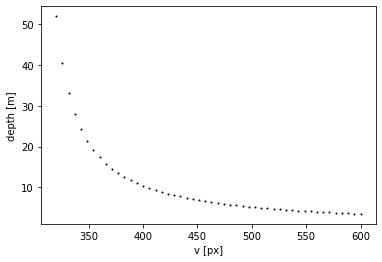

In [4]:
import matplotlib.pyplot as plt

plt.plot(v.squeeze(), coords[0, :], 'ko', ms=1)
plt.xlabel('v [px]')
plt.ylabel('depth [m]')